In [1]:
import requests
import zipfile
import os

# Define the download URL from the JSON file
download_url = "https://www.kaggle.com/api/v1/datasets/download/sunnykakar/shoes-dataset-real-and-ai-generated-images?datasetVersionNumber=2"
zip_file_path = "shoes_dataset.zip"
extract_folder = "shoes_dataset"

# Download the dataset
response = requests.get(download_url, stream=True)
with open(zip_file_path, "wb") as file:
    for chunk in response.iter_content(chunk_size=128):
        file.write(chunk)

# Extract the dataset
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(extract_folder)

print("Dataset downloaded and extracted.")


Dataset downloaded and extracted.


In [2]:
import numpy as np
from PIL import Image
from skimage.color import rgb2gray
from skimage.transform import resize
import glob

# Function to load and preprocess images
def load_images_from_folder(folder, img_size=(64, 64)):
    image_paths = glob.glob(os.path.join(folder, '**', '*.jpg'), recursive=True)
    images = []
    for image_path in image_paths:
        img = Image.open(image_path)
        img = img.resize(img_size)  # Resize to uniform size
        img = np.array(img)
        if img.ndim == 3:  # Convert to grayscale if RGB
            img = rgb2gray(img)
        images.append(img.flatten())  # Flatten the 2D image to 1D
    return np.array(images)

# Example usage
images = load_images_from_folder(extract_folder)
print("Images loaded and preprocessed.")


Images loaded and preprocessed.


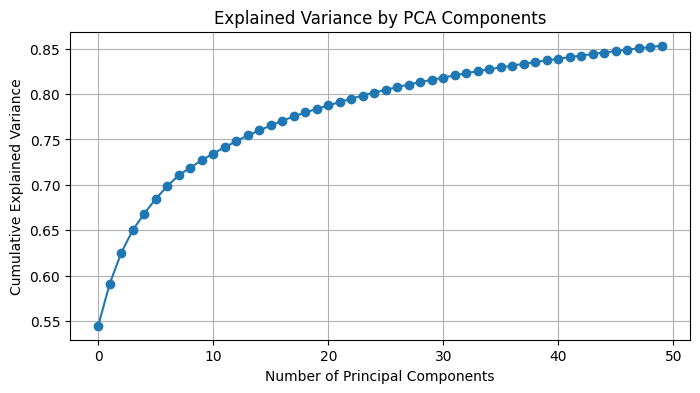

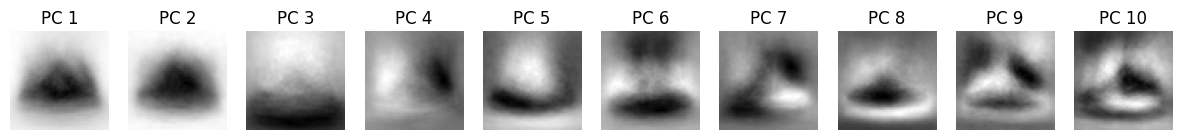

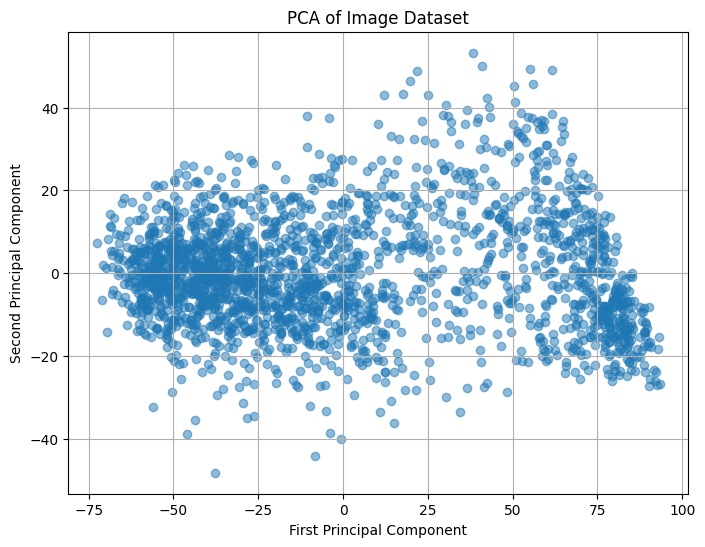

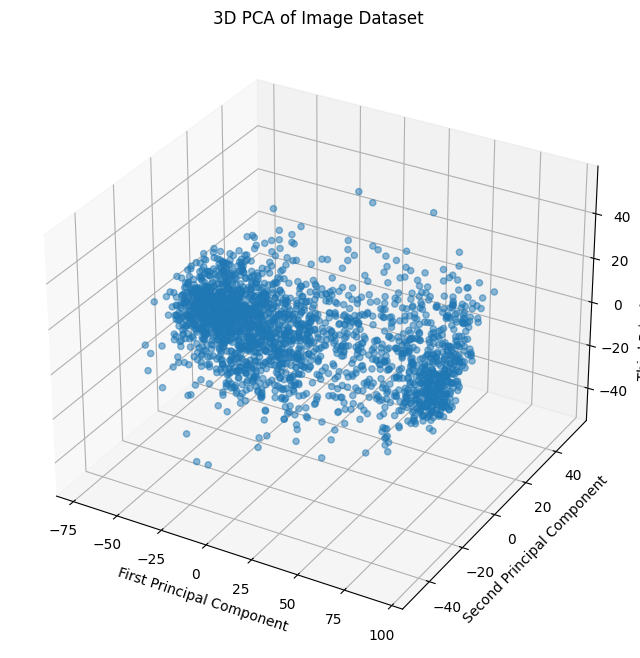

In [3]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
images_standardized = scaler.fit_transform(images)

# Apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=50)  # Example: keep 50 principal components
images_pca = pca.fit_transform(images_standardized)

# Check the explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Visualize the top principal components
def plot_pca_components(pca, n_components, img_size):
    components = pca.components_[:n_components]
    fig, axes = plt.subplots(1, n_components, figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(components[i].reshape(img_size), cmap='gray')
        ax.set_title(f'PC {i+1}')
        ax.axis('off')
    plt.show()

plot_pca_components(pca, n_components=10, img_size=(64, 64))  # Example: visualize top 10 components

# Visualize in 2D
plt.figure(figsize=(8, 6))
plt.scatter(images_pca[:, 0], images_pca[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Image Dataset')
plt.grid(True)
plt.show()

# Optionally, visualize in 3D if desired
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(images_pca[:, 0], images_pca[:, 1], images_pca[:, 2], alpha=0.5)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title('3D PCA of Image Dataset')
plt.show()


These plots show the projection of the dataset onto the first two or three principal components. Each point in the scatter plot represents an image, and its coordinates are the values of the first two or three principal components for that image.
##Insight:
**Clusters and Patterns:**

These plots help you see the structure of the dataset. You might observe clusters or groupings of similar images. For instance, real and AI-generated shoe images might form distinct clusters if the PCA can separate these types well.

**Outliers:**

Outliers or unusual data points become more apparent. These might be images that are significantly different from the rest of the dataset.
##Interpretation:
If you see clear clusters in the scatter plot, it indicates that there are distinct groups within your dataset that PCA has effectively captured. For example, you might see separate clusters for different brands of shoes.

Overlapping clusters might indicate that the dataset contains images that are not easily separable based on the features captured by the principal components.